In [2]:
%load_ext autoreload
%autoreload 1
%aimport pygenesig.pybioqc
%aimport pygenesig.tools
%aimport pygenesig.file_formats
%matplotlib inline


from pygenesig.pybioqc import * 
from pygenesig.bioqc import * 
from pygenesig.tools import * 
from pygenesig.file_formats import * 
from scipy.stats import mannwhitneyu
import pandas as pd
from pylab import * 
import seaborn as sns

In [3]:
exprs = read_expr("../pygenesig-example/data_processed/v6/exprs.npy")
target = read_target("../pygenesig-example/data_processed/v6/target.csv")
rosetta = read_rosetta("../pygenesig-example/data_processed/v6/rosetta.csv", inverse=True)

In [4]:
exprs_m = read_expr("../pygenesig-example/data_processed/mouseGNF/exprs.npy")
target_m = read_target("../pygenesig-example/data_processed/mouseGNF/target.csv")
rosetta_m = read_rosetta("../pygenesig-example/data_processed/mouseGNF/rosetta.csv", inverse=True)

In [63]:
signatures = load_gmt("../pygenesig-example/results/gtex_v6_solid_gini_0.8_1/signatures.gmt")
signatures_ind = translate_signatures(signatures, rosetta, ignore_missing=True)
signatures_ind = {
    tissue: np.array(inds) for tissue, inds in signatures_ind.items()
}
signatures_ind_m = translate_signatures(signatures, rosetta_m, ignore_missing=True)

In [64]:
target_m

array(['adipose_brown', 'adipose_brown', 'adipose_white', 'adipose_white',
       'adrenal_gland', 'adrenal_gland', 'amygdala', 'amygdala',
       'B-cells_marginal_zone', 'B-cells_marginal_zone', 'bladder',
       'bladder', 'bone', 'bone', 'bone_marrow', 'bone_marrow',
       'cerebellum', 'cerebellum', 'cerebral_cortex', 'cerebral_cortex',
       'cerebral_cortex_prefrontal', 'cerebral_cortex_prefrontal',
       'ciliary_bodies', 'ciliary_bodies', 'common_myeloid_progenitor',
       'common_myeloid_progenitor', 'cornea', 'cornea',
       'dendritic_cells_lymphoid_CD8a+', 'dendritic_cells_lymphoid_CD8a+',
       'dendritic_cells_myeloid_CD8a-', 'dendritic_cells_myeloid_CD8a-',
       'dendritic_plasmacytoid_B220+', 'dendritic_plasmacytoid_B220+',
       'dorsal_root_ganglia', 'dorsal_root_ganglia', 'dorsal_striatum',
       'dorsal_striatum', 'epidermis', 'epidermis', 'eyecup', 'eyecup',
       'follicular_B-cells', 'follicular_B-cells',
       'granulo_mono_progenitor', 'granulo_mon

In [86]:
target_name = {
    'tissue1': 'Testis',
    'tissue2': 'Liver'
}

In [87]:
target_name_m = {
    'tissue1': 'testis',
    'tissue2': 'liver'
}

In [93]:
sig_name = {
    'tissue1': 'Testis',
    'tissue2': 'Liver'
}

In [94]:
s_ind = {
    'tissue1': np.flatnonzero(target_m == target_name_m['tissue1'])[0],
    'tissue2': np.flatnonzero(target_m == target_name_m['tissue2'])[0]
}
s_ind

{'tissue1': 148, 'tissue2': 66}

In [95]:
s = {
    tissue: exprs_m[:, i] for tissue, i in s_ind.items()
}

In [96]:
ind = {
    tissue: np.array([True if i in signatures_ind_m[name] else False for i in range(exprs_m.shape[0])])
    for tissue, name in sig_name.items()
}

In [97]:
rel_rk = {
    tissue: pd.DataFrame(exprs[:, target == target_name[tissue]]).rank(
        axis=0, ascending=False).iloc[signatures_ind[sig_name[tissue]], :].median(axis=0).median() / exprs.shape[0] for tissue in s
}
rel_rk

{'tissue1': 0.12066998061651973, 'tissue2': 0.02013380854123679}

In [98]:
size = {
    tissue: sum(t_ind) for tissue, t_ind in ind.items()
}
size

{'tissue1': 693, 'tissue2': 262}

In [99]:
overlap = jaccard_ind(*(signatures_ind_m[sig_name[tissue]] for tissue in s))
overlap

0.015957446808510637

In [100]:
def mix(x, y, prop_x):
    return x * prop_x + y * (1 - prop_x)

In [101]:
def wmw_r_corr(x, y, u, u_exp):
    return 1 - (2 * (u - u_exp)) / (x.size * y.size)

In [102]:
mixed = [mix(s['tissue1'], s['tissue2'], f) for f in np.arange(0, 1.01, 0.01)]

In [103]:
wmw_res = {
    tissue:  [mannwhitneyu(s_mixed[~ind[tissue]], s_mixed[ind[tissue]]) for s_mixed in mixed] for 
    tissue in ind
}
wmw_res

{'tissue1': [MannwhitneyuResult(statistic=2224533.5, pvalue=5.4771477380594151e-146),
  MannwhitneyuResult(statistic=2930464.5, pvalue=8.881433781924492e-87),
  MannwhitneyuResult(statistic=3366072.5, pvalue=5.2771469036089428e-58),
  MannwhitneyuResult(statistic=3686505.5, pvalue=1.2929525646765623e-40),
  MannwhitneyuResult(statistic=3941654.5, pvalue=4.701621947638769e-29),
  MannwhitneyuResult(statistic=4153808.5, pvalue=5.562981734512572e-21),
  MannwhitneyuResult(statistic=4335206.0, pvalue=3.4901496788790206e-15),
  MannwhitneyuResult(statistic=4493860.0, pvalue=6.052519593862651e-11),
  MannwhitneyuResult(statistic=4635043.0, pvalue=8.0508449354052423e-08),
  MannwhitneyuResult(statistic=4761657.0, pvalue=1.5591028295599279e-05),
  MannwhitneyuResult(statistic=4876917.0, pvalue=0.00072076192527321795),
  MannwhitneyuResult(statistic=4981933.5, pvalue=0.010874852433068131),
  MannwhitneyuResult(statistic=5078742.5, pvalue=0.070390257765333933),
  MannwhitneyuResult(statistic=516

In [104]:
wmw_exp = {}
for tissue in ind:
    y = np.repeat(np.percentile(s[tissue], (1- rel_rk[tissue]) * 100), size[tissue])
    u, p = mannwhitneyu(s[tissue], y)
    wmw_exp[tissue] = (wmw_r(s[tissue], y, u), u, p) 
wmw_exp

{'tissue1': (0.75862721594852056, 1325709.0, 1.3647908394616023e-251),
 'tissue2': (0.95962399848589996, 83840.0, 3.6756100890541761e-157)}

In [105]:
u_exp = {
    tissue: wmw_u_exp(rel_rk[tissue], size[tissue], s[tissue].size) for tissue in ind
}
u_exp

{'tissue1': 1085057.7248874507, 'tissue2': 49161.941787031828}

## BioQC score, corrected and uncorrected

In [106]:
wmw_score_corr = {
    tissue: [-np.log10(p) / -np.log10(wmw_exp[tissue][2]) for u, p in res] for tissue, res in wmw_res.items()
}
wmw_score = {
    tissue: [-np.log10(p) for u, p in res] for tissue, res in wmw_res.items()
}

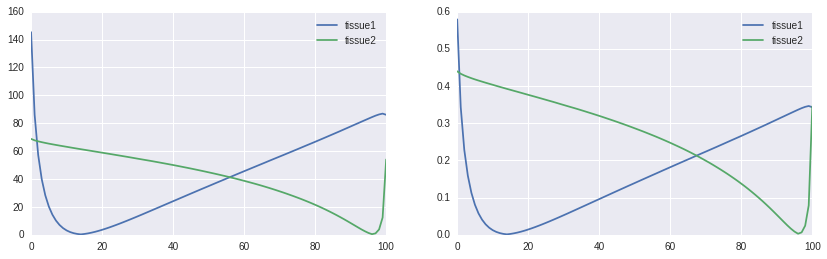

In [107]:
fix, (ax1, ax2) = subplots(1, 2, figsize=(14, 4))
pd.DataFrame(wmw_score).plot(ax=ax1)
pd.DataFrame(wmw_score_corr).plot(ax=ax2)

## $r$ effect size, corrected and uncorrected

In [108]:
r = {
    tissue: [wmw_r(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u) for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}
r_corr = {
    tissue: [wmw_r(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u) / wmw_exp[tissue][0] for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}
r_corr_u = {
    tissue: [wmw_r_corr(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u, u_exp[tissue]) for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}

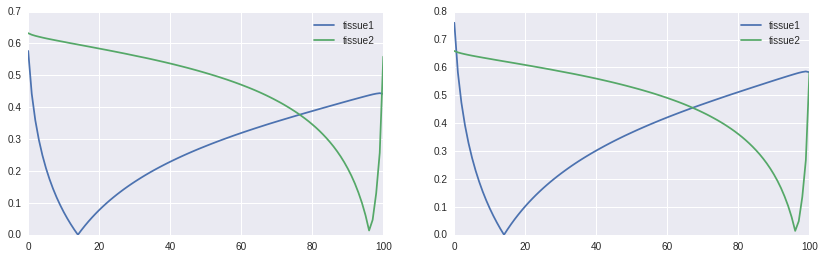

In [109]:
fix, (ax1, ax2) = subplots(1, 2, figsize=(14, 4))
pd.DataFrame(r).plot(ax=ax1)
pd.DataFrame(r_corr).plot(ax=ax2)

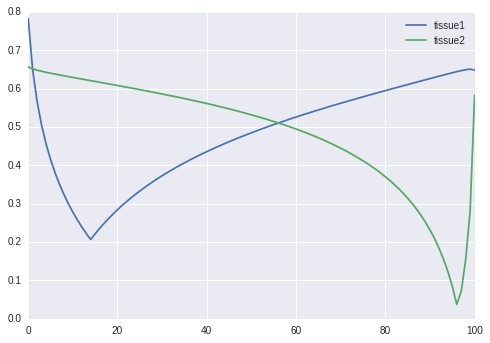

In [110]:
pd.DataFrame(r_corr_u).applymap(lambda x: x).plot()